# Exemplo 1: Vestibular

In [1]:
# Importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as stats
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

## 1.1. Base de dados

In [2]:
# Importando os dados

df = pd.read_excel('datasets/Vestibular.xlsx')

In [3]:
#%% Visualizando os dados e cada uma das variáveis

print(df, "\n")

print(df.info())

     estudante  matemática  física  química
0     Gabriela         3.7     2.7      9.1
1  Luiz Felipe         7.8     8.0      1.5
2     Patrícia         8.9     1.0      2.7
3       Ovídio         7.0     1.0      9.0
4       Leonor         3.4     2.0      5.0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudante   5 non-null      object 
 1   matemática  5 non-null      float64
 2   física      5 non-null      float64
 3   química     5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 288.0+ bytes
None


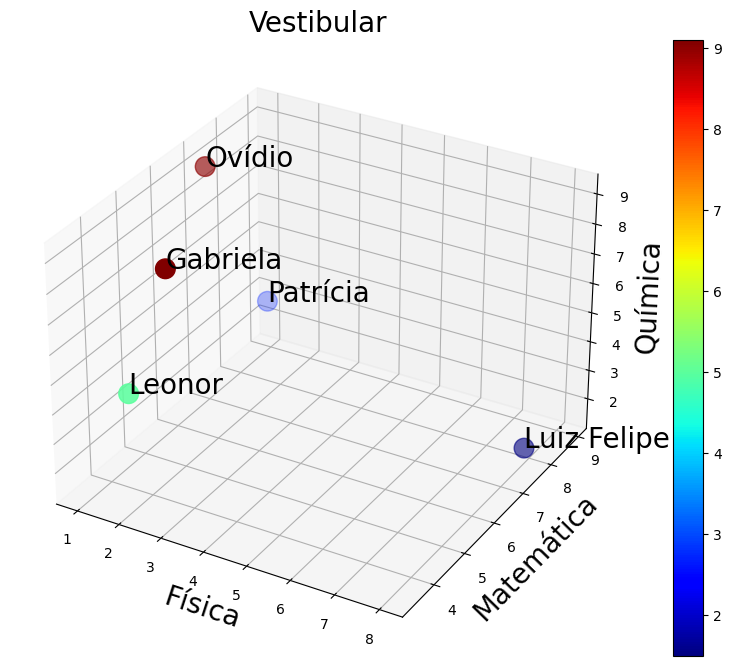

In [4]:
# Gráfico 3D com scatter

from mpl_toolkits.mplot3d import Axes3D

# Criação da figura e do eixo 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

cs = df['química'] # colorscheme
# s = pointsize
# c = sequencia de cores
# cmap = colormap

# Gráfico de dispersão 3D
scatter = ax.scatter3D(df['física'], 
             df['matemática'], 
             df['química'],
             s = 200,
             c=cs,
             cmap='jet')

# Configurações dos eixos e do título
ax.set_xlabel('Física',
              fontsize = 20)
ax.set_ylabel('Matemática',
              fontsize = 20)
ax.set_zlabel('Química',
              fontsize = 20)
plt.title('Vestibular',
              fontsize = 20)

# Rótulos dos pontos
for i, txt in enumerate(df['estudante']):
    ax.text(df['física'][i],  
            df['matemática'][i],  
            df['química'][i], 
            '%s' % (txt), 
            size = 20)

cbar = plt.colorbar(scatter)
cbar.ax.set_xlabel('Nota de química', 
                   fontsize = 20)
plt.show()

In [5]:
# Estatísticas descritivas
summary = df.describe(include = 'all')
print(summary)

       estudante  matemática    física   química
count          5    5.000000  5.000000  5.000000
unique         5         NaN       NaN       NaN
top     Gabriela         NaN       NaN       NaN
freq           1         NaN       NaN       NaN
mean         NaN    6.160000  2.940000  5.460000
std          NaN    2.478508  2.918561  3.510413
min          NaN    3.400000  1.000000  1.500000
25%          NaN    3.700000  1.000000  2.700000
50%          NaN    7.000000  2.000000  5.000000
75%          NaN    7.800000  2.700000  9.000000
max          NaN    8.900000  8.000000  9.100000


In [6]:
#%% Realizando o ZScore
                       
# Muitas vezes, é importante realizar o procedimento Z-Score nas variáveis
# Quando as variáveis estiverem em unidades de medidas distintas
# Poderia ser feito da seguinte forma, embora aqui não utilizaremos

from sklearn.preprocessing import scale
newdf = pd.DataFrame(scale(df.iloc[:, 1:4]),
                     index=df.iloc[:, 1:4].index,
                     columns=df.iloc[:, 1:4].columns)
newdf.insert(0, "estudante" ,df['estudante'])
print(newdf, '\n')
print(newdf.describe(include = 'all'))

# Neste caso, vamos utilizar as variáveis originais
# Todas são notas de 0 a 10

     estudante  matemática    física   química
0     Gabriela   -1.109685 -0.091939  1.159306
1  Luiz Felipe    0.739790  1.938370 -1.261223
2     Patrícia    1.235991 -0.743170 -0.879034
3       Ovídio    0.378917 -0.743170  1.127457
4       Leonor   -1.245013 -0.360092 -0.146506 

       estudante    matemática        física       química
count          5  5.000000e+00  5.000000e+00  5.000000e+00
unique         5           NaN           NaN           NaN
top     Gabriela           NaN           NaN           NaN
freq           1           NaN           NaN           NaN
mean         NaN  3.108624e-16  4.440892e-17  5.551115e-18
std          NaN  1.118034e+00  1.118034e+00  1.118034e+00
min          NaN -1.245013e+00 -7.431696e-01 -1.261223e+00
25%          NaN -1.109685e+00 -7.431696e-01 -8.790344e-01
50%          NaN  3.789170e-01 -3.600925e-01 -1.465057e-01
75%          NaN  7.397902e-01 -9.193850e-02  1.127457e+00
max          NaN  1.235991e+00  1.938370e+00  1.159306e+00


## 1.2. Clusterização hierárquica aglomerativa

In [7]:
import matplotlib as mpl
# Override the default linewidth.
mpl.rcParams['lines.linewidth'] = 3

### - Single Linkage

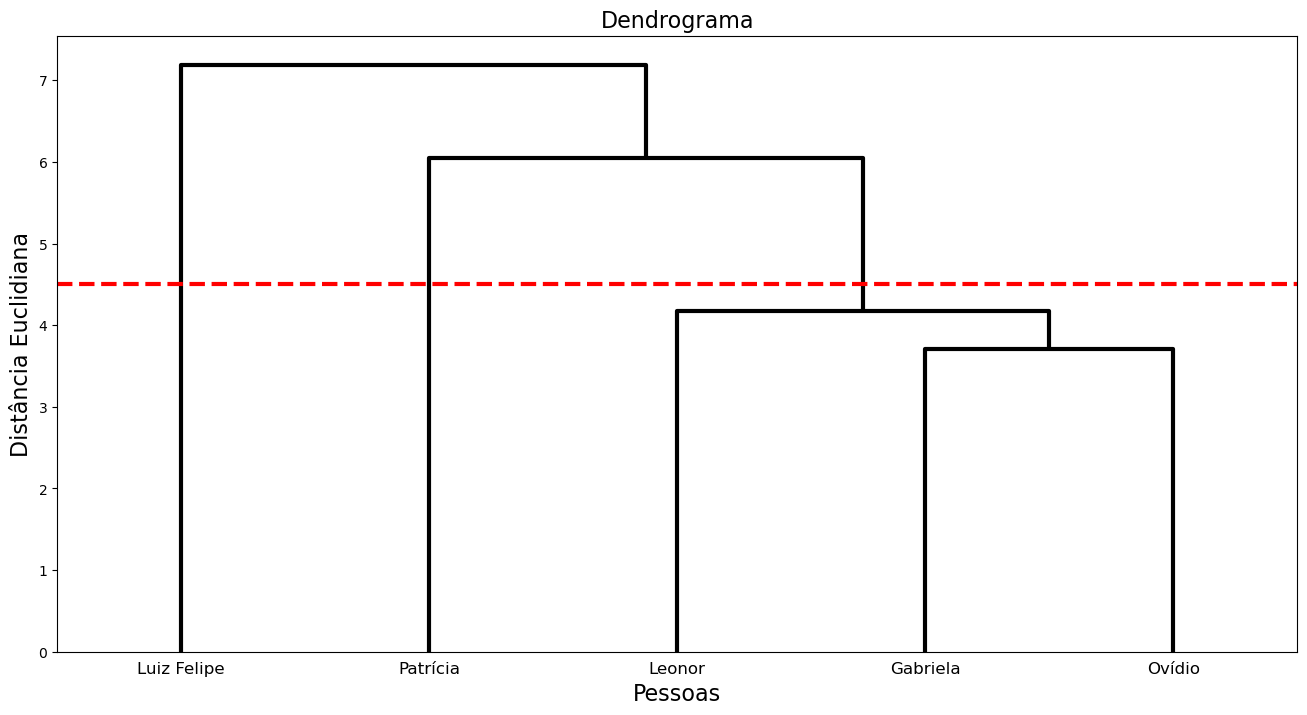

In [8]:
# Gerando o dendrograma 




## Inicialmente, vamos utilizar: 
## Distância euclidiana e método de encadeamento single linkgage

plt.figure(figsize=(16,8))

sch.set_link_color_palette(['black'])
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:, 1:], method = 'single', metric = 'euclidean'), labels = list(df.estudante), above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average

# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation


In [9]:
# Gerando a variável com a indicação do cluster no dataset

## Deve ser realizada a parametrização:
    ## Número de clusters
    ## Medida de distância
    ## Método de encadeamento
    
## Como já observamos 3 clusters pelo dendrograma, vamos selecionar "3" clusters
## A medida de distância e o método de encadeamento são mantidos

cluster_sing = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single', compute_distances=True)
indica_cluster_sing = cluster_sing.fit_predict(df.iloc[:, 1:4])

# Retorna uma lista de valores com o cluster de cada observação

print(indica_cluster_sing, "\n")

df['cluster_single'] = indica_cluster_sing

print(df)

[0 1 2 0 0] 

     estudante  matemática  física  química  cluster_single
0     Gabriela         3.7     2.7      9.1               0
1  Luiz Felipe         7.8     8.0      1.5               1
2     Patrícia         8.9     1.0      2.7               2
3       Ovídio         7.0     1.0      9.0               0
4       Leonor         3.4     2.0      5.0               0


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [10]:
# Calcular a matriz de dissimilaridade

from sklearn.metrics import pairwise_distances

dist_matrix = pairwise_distances(df.iloc[:, 1:4], metric='euclidean')

print(dist_matrix)


[[ 0.         10.13212712  8.41961994  3.71348893  4.17013189]
 [10.13212712  0.          7.18679344 10.29028668  8.22253002]
 [ 8.41961994  7.18679344  0.          6.58027355  6.0448325 ]
 [ 3.71348893 10.29028668  6.58027355  0.          5.47357287]
 [ 4.17013189  8.22253002  6.0448325   5.47357287  0.        ]]


In [11]:
# As distâncias para as combinações em cada estágio
coeficientes = cluster_sing.distances_

print(coeficientes)

[3.71348893 4.17013189 6.0448325  7.18679344]


In [12]:
print(df.groupby('cluster_single').agg({'matemática': ['mean', 'std', 'min', 'max']}), '\n')
print(df.groupby('cluster_single').agg({'física': ['mean', 'std', 'min', 'max']}), '\n')
print(df.groupby('cluster_single').agg({'química': ['mean', 'std', 'min', 'max']}))

               matemática                    
                     mean       std  min  max
cluster_single                               
0                     4.7  1.997498  3.4  7.0
1                     7.8       NaN  7.8  7.8
2                     8.9       NaN  8.9  8.9 

               física                  
                 mean     std  min  max
cluster_single                         
0                 1.9  0.8544  1.0  2.7
1                 8.0     NaN  8.0  8.0
2                 1.0     NaN  1.0  1.0 

               química                    
                  mean       std  min  max
cluster_single                            
0                  7.7  2.338803  5.0  9.1
1                  1.5       NaN  1.5  1.5
2                  2.7       NaN  2.7  2.7


In [13]:
# Análise de variância de um fator (ANOVA). Interpretação do output:

## Mean Sq do cluster_H: indica a variabilidade entre grupos
## Mean Sq dos Residuals: indica a variabilidade dentro dos grupos
## F value: estatística de teste (Sum Sq do cluster_H / Sum Sq dos Residuals)
## Pr(>F): p-valor da estatística 
## p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

## A variável mais discriminante dos grupos contém maior estatística F (e significativa)

from statsmodels.formula.api import ols
import statsmodels.api as sm

# ANOVA da variável 'matematica'
model = ols('matemática ~ C(cluster_single)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table = aov_table
print(aov_table, '\n')

# ANOVA da variável 'matematica'
model = ols('física ~ C(cluster_single)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table, '\n')

# ANOVA da variável 'matematica'
model = ols('química ~ C(cluster_single)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table, '\n')

                   sum_sq   df         F   PR(>F)
C(cluster_single)  16.592  2.0  2.079198  0.32476
Residual            7.980  2.0       NaN      NaN 

                   sum_sq   df          F   PR(>F)
C(cluster_single)  32.612  2.0  22.336986  0.04285
Residual            1.460  2.0        NaN      NaN 

                   sum_sq   df         F    PR(>F)
C(cluster_single)  38.352  2.0  3.505667  0.221943
Residual           10.940  2.0       NaN       NaN 



### - Complete e Average Linkage

In [14]:
# Comparando clusters resultantes por diferentes métodos de encadeamento

# Complete linkage

cluster_comp = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(df.iloc[:, 1:4])

print(indica_cluster_comp, "\n")

df['cluster_complete'] = indica_cluster_comp

print(df)

[0 2 1 0 0] 

     estudante  matemática  física  química  cluster_single  cluster_complete
0     Gabriela         3.7     2.7      9.1               0                 0
1  Luiz Felipe         7.8     8.0      1.5               1                 2
2     Patrícia         8.9     1.0      2.7               2                 1
3       Ovídio         7.0     1.0      9.0               0                 0
4       Leonor         3.4     2.0      5.0               0                 0


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [15]:
# Comparando clusters resultantes por diferentes métodos de encadeamento

# Average linkage

cluster_avg = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
indica_cluster_avg = cluster_avg.fit_predict(df.iloc[:, 1:4])

print(indica_cluster_avg, "\n")

df['cluster_average'] = indica_cluster_avg

print(df)

## Inclusive, poderiam ser alteradas as medidas de distância também

[0 1 2 0 0] 

     estudante  matemática  física  química  cluster_single  cluster_complete  \
0     Gabriela         3.7     2.7      9.1               0                 0   
1  Luiz Felipe         7.8     8.0      1.5               1                 2   
2     Patrícia         8.9     1.0      2.7               2                 1   
3       Ovídio         7.0     1.0      9.0               0                 0   
4       Leonor         3.4     2.0      5.0               0                 0   

   cluster_average  
0                0  
1                1  
2                2  
3                0  
4                0  


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## 1.3. Clusterização não-hierárquica KMeans

In [16]:
# Considerando que identificamos 3 possíveis clusters na análise hierárquica

kmeans = KMeans(n_clusters = 3, init = 'random').fit(df.iloc[:, 1:4])


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
#%% Para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_

print(kmeans_clusters)

df['cluster_kmeans'] = kmeans_clusters

print(df)


[0 2 1 0 0]
     estudante  matemática  física  química  cluster_single  cluster_complete  \
0     Gabriela         3.7     2.7      9.1               0                 0   
1  Luiz Felipe         7.8     8.0      1.5               1                 2   
2     Patrícia         8.9     1.0      2.7               2                 1   
3       Ovídio         7.0     1.0      9.0               0                 0   
4       Leonor         3.4     2.0      5.0               0                 0   

   cluster_average  cluster_kmeans  
0                0               0  
1                1               2  
2                2               1  
3                0               0  
4                0               0  


In [18]:
#%% Identificando as coordenadas centróides dos clusters finais

cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = df.iloc[:, 1:4].columns
cent_finais.index.name = 'cluster'
print(cent_finais)


         matemática  física  química
cluster                             
0               4.7     1.9      7.7
1               8.9     1.0      2.7
2               7.8     8.0      1.5


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


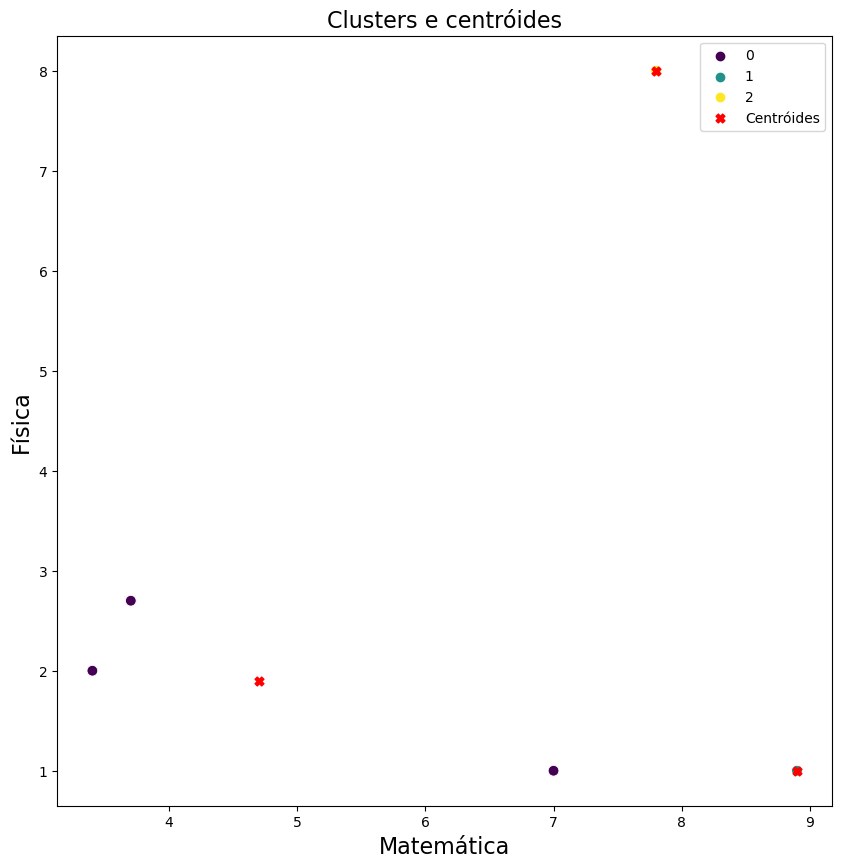

In [19]:
#%% Plotando as observações e seus centróides dos clusters

plt.figure(figsize=(10,10))

pred_y = kmeans.fit_predict(df.iloc[:, 1:4])
sns.scatterplot(x='matemática', y='física', data=df, hue='cluster_kmeans', palette='viridis', s=60)
plt.scatter(cent_finais['matemática'], cent_finais['física'], s = 40, c = 'red', label = 'Centróides', marker="X")
plt.title('Clusters e centróides', fontsize=16)
plt.xlabel('Matemática', fontsize=16)
plt.ylabel('Física', fontsize=16)
plt.legend()
plt.show()

/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


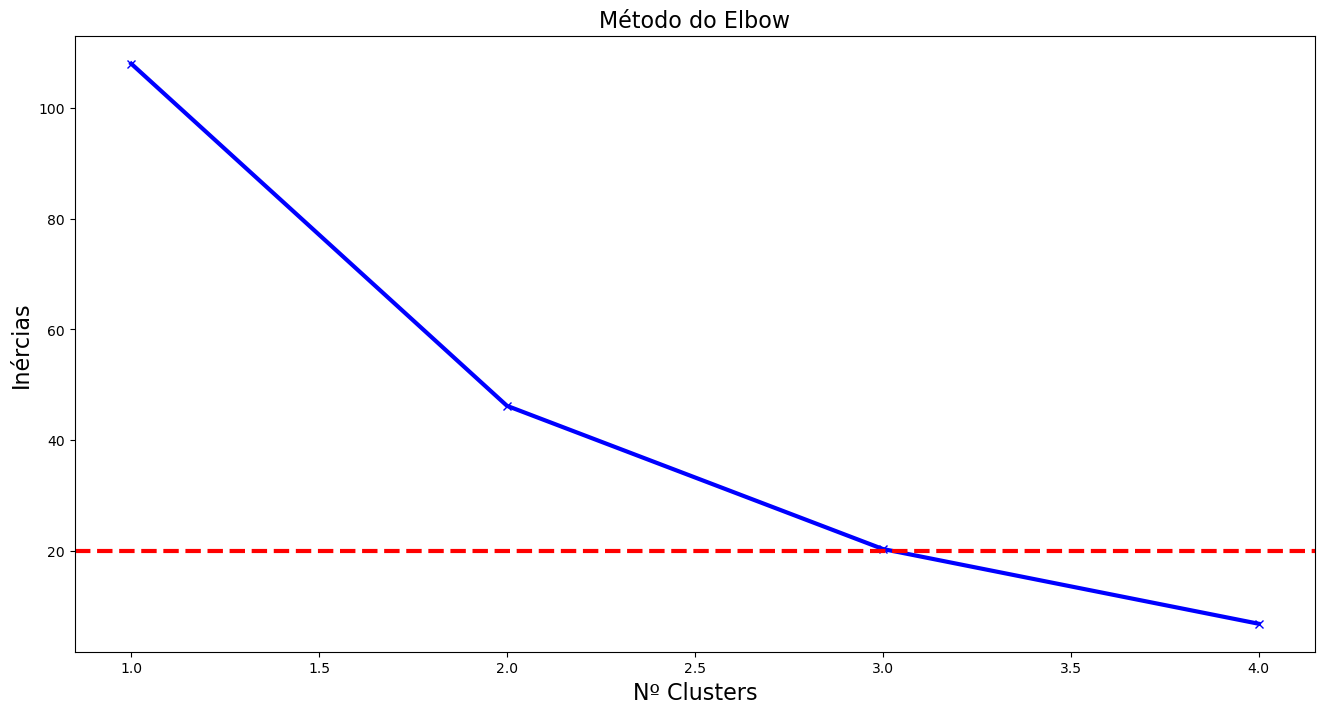

In [20]:
# Identificação da quantidade de clusters

# Método Elbow para identificação do nº de clusters
## Elaborado com base na "inércia": distância de cada obervação para o centróide de seu cluster
## Quanto mais próximos entre si e do centróide, menor a inércia

inercias = []
K = range(1,df.iloc[:, 1:4].shape[0])
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df.iloc[:, 1:4])
    inercias.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inercias, 'bx-')
plt.axhline(y = 20, color = 'red', linestyle = '--')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Inércias', fontsize=16)
plt.title('Método do Elbow', fontsize=16)
plt.show()

# Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra"

In [21]:
# Análise de variância de um fator (ANOVA). Interpretação do output:

## Mean Sq do cluster_H: indica a variabilidade entre grupos
## Mean Sq dos Residuals: indica a variabilidade dentro dos grupos
## F value: estatística de teste (Sum Sq do cluster_H / Sum Sq dos Residuals)
## Pr(>F): p-valor da estatística 
## p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

## A variável mais discriminante dos grupos contém maior estatística F (e significativa)

from statsmodels.formula.api import ols
import statsmodels.api as sm

# ANOVA da variável 'matematica'
model = ols('matemática ~ C(cluster_kmeans)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table = aov_table
print(aov_table, '\n')

# ANOVA da variável 'matematica'
model = ols('física ~ C(cluster_kmeans)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table, '\n')

# ANOVA da variável 'matematica'
model = ols('química ~ C(cluster_kmeans)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table, '\n')

                   sum_sq   df         F   PR(>F)
C(cluster_kmeans)  16.592  2.0  2.079198  0.32476
Residual            7.980  2.0       NaN      NaN 

                   sum_sq   df          F   PR(>F)
C(cluster_kmeans)  32.612  2.0  22.336986  0.04285
Residual            1.460  2.0        NaN      NaN 

                   sum_sq   df         F    PR(>F)
C(cluster_kmeans)  38.352  2.0  3.505667  0.221943
Residual           10.940  2.0       NaN       NaN 



In [22]:
#%% Gráfico 3D dos clusters

import plotly.express as px 
import plotly.io as pio

pio.renderers.default='browser'

fig = px.scatter_3d(df, 
                    x='matemática', 
                    y='química', 
                    z='física',
                    color='cluster_kmeans')
fig.show()

# Exemplo 2: Países

## 2.1. Base de dados

In [23]:
# Importando os dados

df = pd.read_csv('datasets/dados_paises.csv')

In [24]:
#%% Visualizando os dados e cada uma das variáveis
df.head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [26]:
# Estatísticas descritivas
summary = df.describe(include = 'all')
summary

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


In [27]:
## As variáveis apresentam unidades de medida e amplitudes muito distintas

# Padronizando as variáveis

from sklearn.preprocessing import scale
newdf = pd.DataFrame(scale(df.iloc[:, 1:]),
                     index=df.iloc[:, 1:].index,
                     columns=df.iloc[:, 1:].columns)
newdf.insert(0, "country" ,df['country'])
newdf.head(10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,Argentina,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,Armenia,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,Australia,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,Austria,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,Azerbaijan,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


## 2.2. Clusterização hierárquica aglomerativa

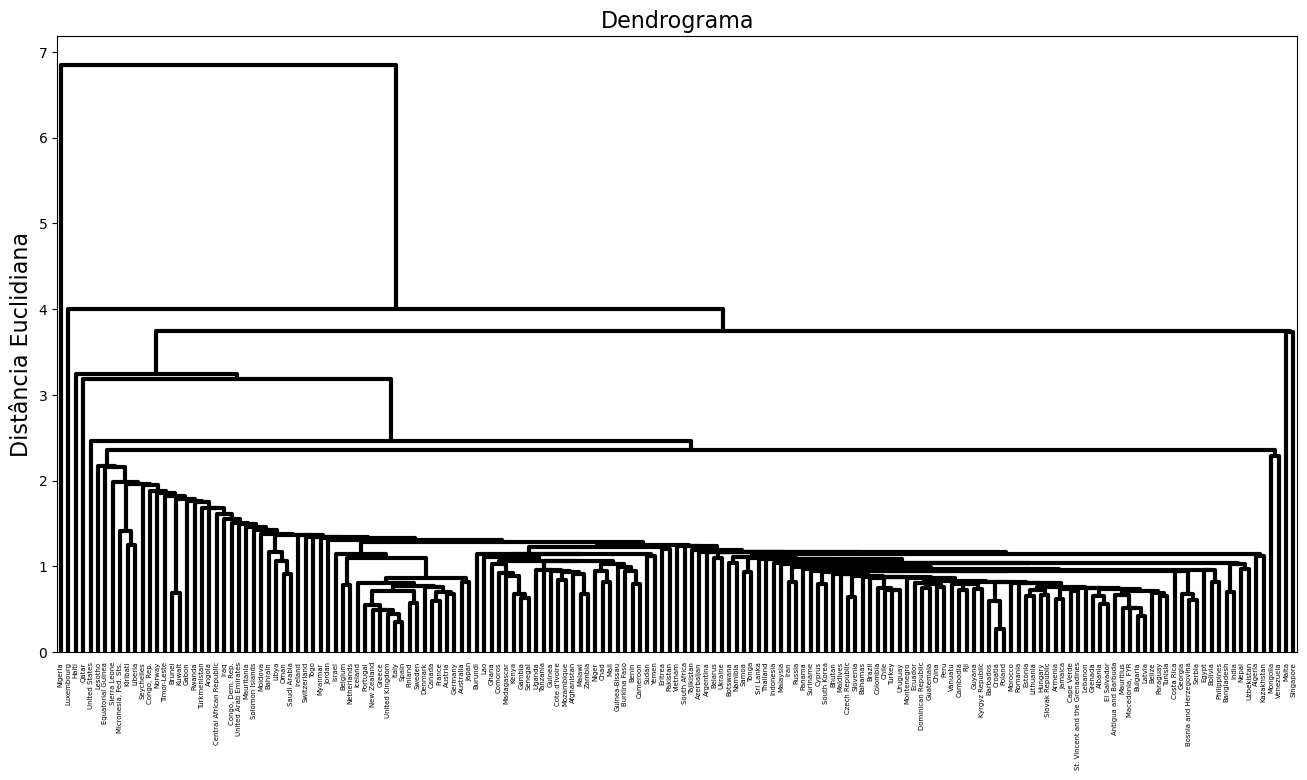

In [28]:
# 1º Teste: Elaboração da clusterização hierárquica como "single linkage"


plt.figure(figsize=(16,8))
sch.set_link_color_palette(['black'])
dendrogram = sch.dendrogram(sch.linkage(newdf.iloc[:, 1:], method = 'single', metric = 'euclidean'), labels = list(newdf.country), above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
#plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
#plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

## O método de encadeamento single linkage não permite uma clusterização útil
## Pode-se interpretar que as observações estão muito próximas umas das outras

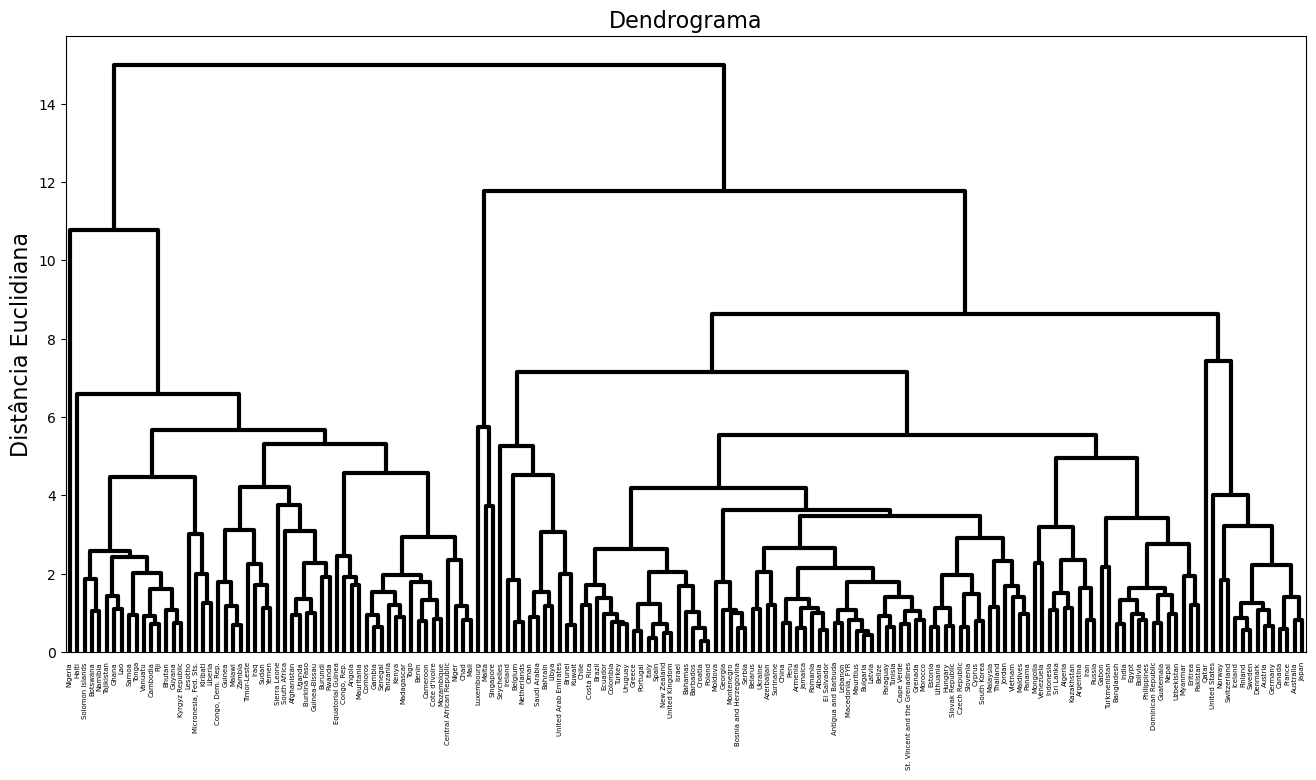

In [29]:
# 2º Teste: Elaboração da clusterização hierárquica como "complete linkage"

plt.figure(figsize=(16,8))
sch.set_link_color_palette(['black'])
dendrogram = sch.dendrogram(sch.linkage(newdf.iloc[:, 1:], method = 'complete', metric = 'euclidean'), labels = list(newdf.country), above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
#plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
#plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

## O método de encadeamento complete linkage melhora significativamente

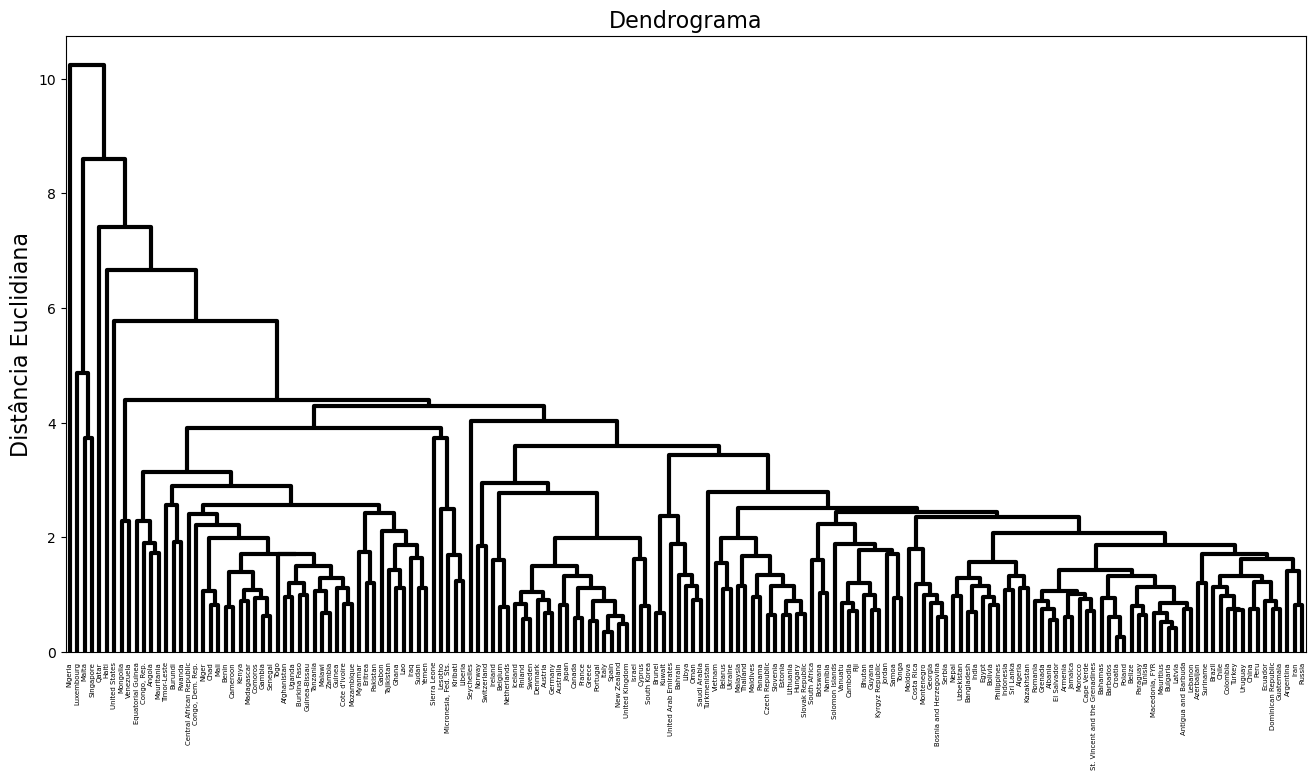

In [30]:
# 3º Teste: Elaboração da clusterização hierárquica como "average linkage"

plt.figure(figsize=(16,8))
sch.set_link_color_palette(['black'])
dendrogram = sch.dendrogram(sch.linkage(newdf.iloc[:, 1:], method = 'average', metric = 'euclidean'), labels = list(newdf.country), above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
#plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
#plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

## Vamos optar pelo complete linkage (average cria clusters com menos observações)

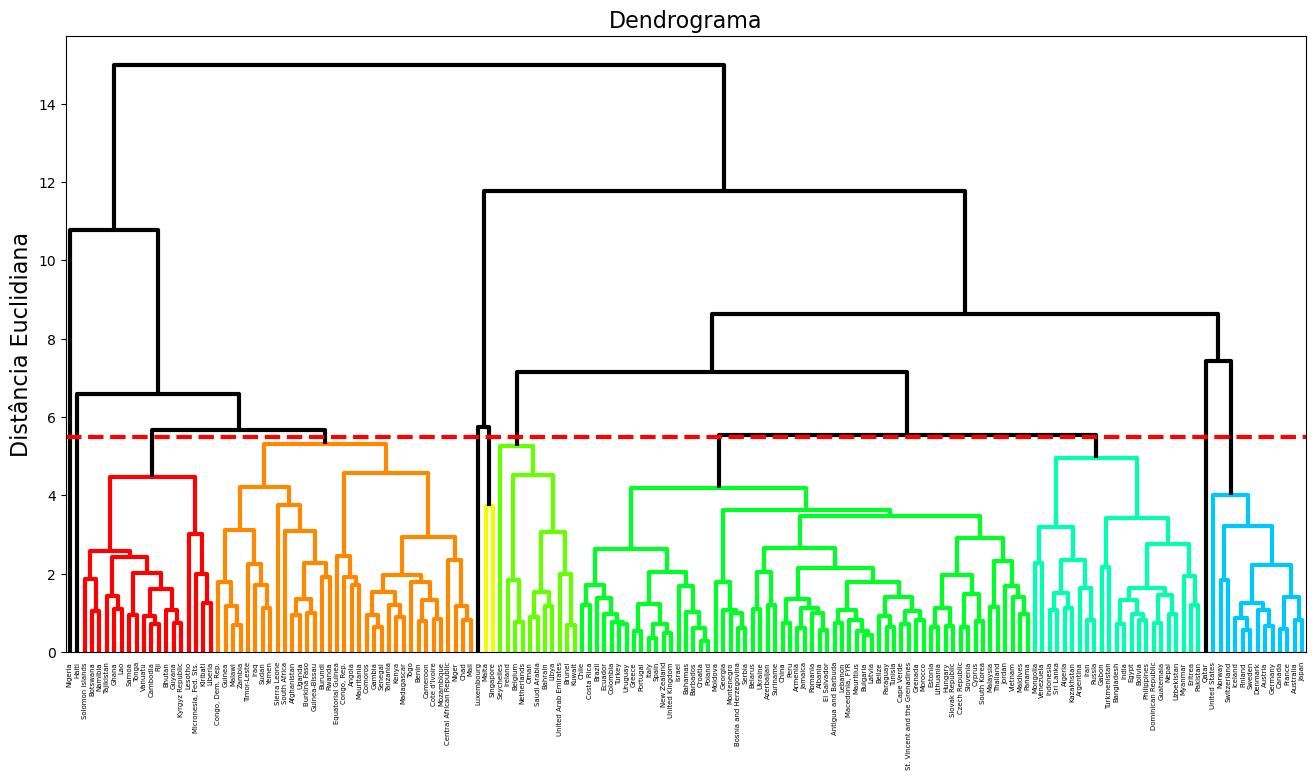

In [31]:

import matplotlib.cm as cm


# Definir a paleta de cores
cmap = cm.hsv(np.linspace(0, 1, 12))



plt.figure(figsize=(16,8))
sch.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
dendrogram = sch.dendrogram(sch.linkage(newdf.iloc[:, 1:], method = 'complete', metric = 'euclidean'), labels = list(newdf.country), color_threshold = 5.5, above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
#plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 5.5, color = 'red', linestyle = '--')
plt.show()


# As folhas com cor preta representam clusters únicos


In [32]:
# Vamos gerar uma variável indicando 12 clusters

clusters = AgglomerativeClustering(n_clusters = None, distance_threshold = 5.5, metric = 'euclidean', linkage = 'complete', compute_distances=False)
indica_clusters = clusters.fit_predict(newdf.iloc[:, 1:])


df['cluster_H'] = indica_clusters
newdf['cluster_H'] = indica_clusters

print(indica_clusters, "\n")


print(df.head(10))

[ 0 10  1  0 10  1 10  9  9 10 10  2  1 10 10  2 10  0  4  1 10  4 10  2
 10  0  0  4  0  9 10  0  0 10 10 10  0  0  0 10  0 10 10 10  9  1 10  1
 10  0  1 10  4  9  9  1  0 10  9  4 10 10  1  0  0  4  7 10  9  1  1  1
  0  2 10 10 10  9 10  1  0  4  2  4  4 10 10  4  4  2 10  8 10  0  0 10
 10  0  6  0 10  4 10  1 10 10  0  1  4  1  2 10  0  3  9  2  1 10 10 10
  1 10 10  5 10  1  0  4  2  0 10  2  0  6 10 10  4  0 10 10  1 10  0 10
  9  9  4  0 10  0  0  4 10 10  1  0 10  2 10  9 10  1  4  1 10  0  0] 

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
5            Argentina        14.5     18.9    8.10     1

In [33]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# ANOVA


columns = newdf.columns.values[1:-1]
for column in columns:
    print(column)
    formula = column + ' ~ C(cluster_H)'
    model = ols(formula, data=newdf).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    aov_table = aov_table
    print(aov_table, '\n')
    
## Todas auxiliam na formação de pelo menos um cluster

child_mort
                  sum_sq     df          F        PR(>F)
C(cluster_H)  134.107144   10.0  63.602609  6.748305e-50
Residual       32.892856  156.0        NaN           NaN 

exports
                  sum_sq     df          F        PR(>F)
C(cluster_H)  102.661767   10.0  24.892253  1.259408e-27
Residual       64.338233  156.0        NaN           NaN 

health
                  sum_sq     df         F        PR(>F)
C(cluster_H)   58.361118   10.0  8.380364  7.820675e-11
Residual      108.638882  156.0       NaN           NaN 

imports
                 sum_sq     df          F        PR(>F)
C(cluster_H)  103.96978   10.0  25.732555  2.666363e-28
Residual       63.03022  156.0        NaN           NaN 

income
                  sum_sq     df          F        PR(>F)
C(cluster_H)  136.087774   10.0  68.677333  5.629909e-52
Residual       30.912226  156.0        NaN           NaN 

inflation
                  sum_sq     df          F        PR(>F)
C(cluster_H)  109.027591   10.0  

In [34]:
columns

array(['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype=object)

In [35]:
analise = df.groupby('cluster_H').agg({'child_mort': 'mean', 'exports': 'mean', 'health': 'mean', 'imports': 'mean', 'income': 'mean',
       'inflation': 'mean', 'life_expec': 'mean', 'total_fer': 'mean', 'gdpp': 'mean'})

analise

## Por exemplo: os países do cluster 4 e 5 apresentam: 
## Baixa renda média, baixo PIB per capita, 
## Elevada mortalidade infantil, baixa expectativa de vida
## Portanto, são os países em que deve haver ajuda para melhoria das condições

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_H,,,,,,,,,
0,94.468571,29.297714,6.312857,38.994286,3540.942857,10.484429,59.702857,5.360286,1717.457143
1,38.547826,28.359957,4.381739,27.320257,9561.739130,14.767391,69.808696,2.790000,4256.521739
2,10.009091,73.400000,5.475455,56.545455,47954.545455,8.194364,77.236364,2.201818,30400.000000
3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000
4,48.788889,36.744444,7.321667,67.916667,4393.888889,6.090000,63.794444,3.483333,2353.944444
5,9.000000,62.300000,1.810000,23.800000,125000.000000,6.980000,79.500000,2.070000,70300.000000
6,4.800000,176.500000,6.305000,164.000000,50200.000000,1.892000,81.500000,1.255000,33850.000000
7,208.000000,15.300000,6.910000,64.700000,1500.000000,5.450000,32.100000,3.330000,662.000000
8,2.800000,175.000000,7.770000,142.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000


# Exemplo 3: Pesquisa Binária

## 3.1. Base de dados

In [103]:
# pip install pyreadr

In [104]:
# Importando os dados
import pyreadr

result = pyreadr.read_r('datasets/pesquisa_binaria.RData') 
print(result.keys())

odict_keys(['PesquisaBinária'])


In [105]:
df = result["PesquisaBinária"]

## Contexto: são respostas binárias para 50 perguntas de 35 respondentes
## Os respondentes são gestores de empresas em 3 setores distintos

In [106]:
#%% Visualizando os dados e cada uma das variáveis
df.head(10)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q42,q43,q44,q45,q46,q47,q48,q49,q50,setor
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0
4,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0
5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
6,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0
7,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   q1      35 non-null     float64
 1   q2      35 non-null     float64
 2   q3      35 non-null     float64
 3   q4      35 non-null     float64
 4   q5      35 non-null     float64
 5   q6      35 non-null     float64
 6   q7      35 non-null     float64
 7   q8      35 non-null     float64
 8   q9      35 non-null     float64
 9   q10     35 non-null     float64
 10  q11     35 non-null     float64
 11  q12     35 non-null     float64
 12  q13     35 non-null     float64
 13  q14     35 non-null     float64
 14  q15     35 non-null     float64
 15  q16     35 non-null     float64
 16  q17     35 non-null     float64
 17  q18     35 non-null     float64
 18  q19     35 non-null     float64
 19  q20     35 non-null     float64
 20  q21     35 non-null     float64
 21  q22     35 non-null     float64
 22  q23 

In [40]:
# Contagem das categorias por variável

# Função para aplicar o summary(as.factor())
def apply_summary(column):
    return column.value_counts()

df.apply(apply_summary)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q42,q43,q44,q45,q46,q47,q48,q49,q50,setor
0.0,25.0,20.0,26.0,22.0,24.0,18.0,22.0,25.0,19.0,20.0,...,14.0,22.0,12.0,26.0,18.0,35.0,12.0,27.0,11.0,NaN
1.0,10.0,15.0,9.0,13.0,11.0,17.0,13.0,10.0,16.0,15.0,...,21.0,13.0,23.0,9.0,17.0,NaN,23.0,8.0,24.0,11.0
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0


## 3.2. Clusterização hierárquica aglomerativa

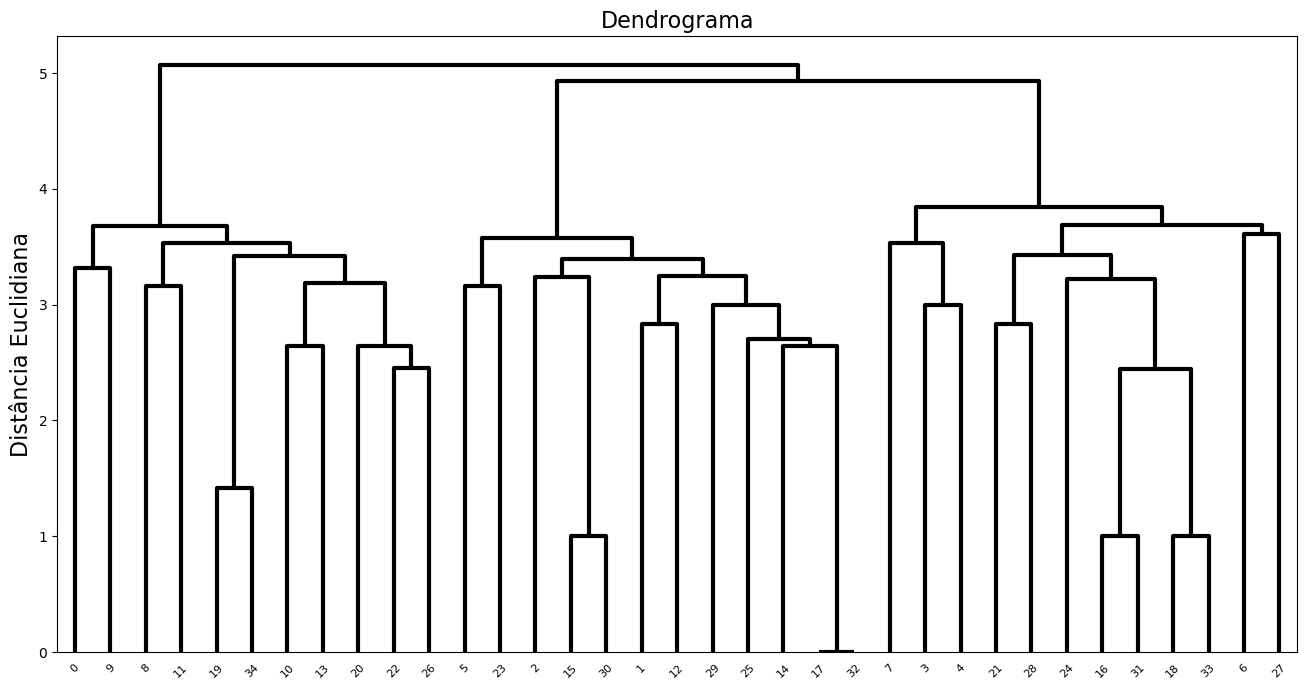

In [41]:
# Dendrograma


plt.figure(figsize=(16,8))
sch.set_link_color_palette(['black'])
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:, :-1], method = 'average', metric = 'euclidean'), above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()


In [49]:
# Vamos gerar uma variável indicando 3 clusters

# Note que 'distance_threshold = None', pois estamos indicando que queremos 3 clusters
# mas não sabemos qual a distância de corte. 

clusters = AgglomerativeClustering(n_clusters = 3, distance_threshold = None, metric = 'euclidean', linkage = 'average', compute_distances=True)
indica_clusters = clusters.fit_predict(df.iloc[:, :50])


df['cluster_H'] = indica_clusters

print(indica_clusters, "\n")


print(df.head(10))

[1 2 2 0 0 2 0 0 1 1 1 1 2 1 2 2 0 2 0 1 1 0 1 2 0 2 1 0 0 2 2 0 2 0 1] 

    q1   q2   q3   q4   q5   q6   q7   q8   q9  q10  ...  q43  q44  q45  q46  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  1.0  1.0  1.0   
2  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  ...  0.0  1.0  0.0  0.0   
3  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0  1.0   
4  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  ...  0.0  1.0  0.0  1.0   
5  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  1.0  0.0  1.0   
6  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  1.0   
7  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0  1.0   
8  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   q47  q48  q49  q50  setor  cluster_H  
0  

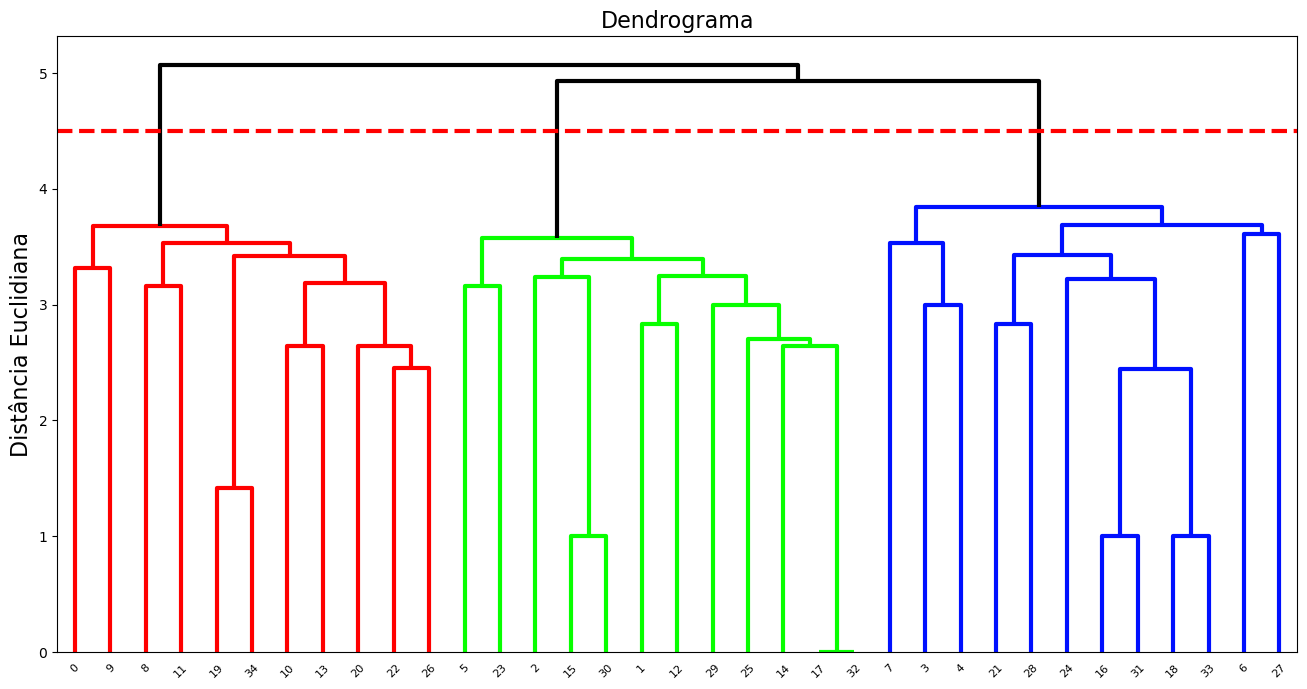

In [53]:
# Definir a paleta de cores
cmap = cm.hsv(np.linspace(0, 1, 4))


plt.figure(figsize=(16,8))
sch.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
dendrogram = sch.dendrogram(sch.linkage(df.iloc[:, :50], method = 'average', metric = 'euclidean'), color_threshold = 4.5, above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
#plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()


# Exemplo 4: Regional Varejista

## 4.1. Base de dados

In [108]:
# pip install pyreadr

In [109]:
# Importando os dados
import pyreadr

result = pyreadr.read_r('datasets/regional_varejista.RData') 
print(result.keys())

odict_keys(['RegionalVarejista'])


In [110]:
df = result["RegionalVarejista"]

## Contexto: notas médias de cada uma das 18 lojas para os 3 atributos medidos
## As lojas estão divididas em 3 regionais

In [111]:
#%% Visualizando os dados e cada uma das variáveis
df

,loja,regional,atendimento,sortimento,organização
0,01,Regional 3,6.0,6.0,4.0
1,02,Regional 3,14.0,2.0,4.0
2,03,Regional 3,8.0,4.0,6.0
3,04,Regional 3,4.0,4.0,4.0
4,05,Regional 3,6.0,6.0,6.0
5,06,Regional 2,38.0,38.0,100.0
6,07,Regional 1,40.0,78.0,38.0
7,08,Regional 3,6.0,4.0,4.0
8,09,Regional 3,4.0,4.0,6.0
9,10,Regional 3,6.0,6.0,2.0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loja         18 non-null     object 
 1   regional     18 non-null     object 
 2   atendimento  18 non-null     float64
 3   sortimento   18 non-null     float64
 4   organização  18 non-null     float64
dtypes: float64(3), object(2)
memory usage: 848.0+ bytes


In [79]:
summary = df.describe(include = 'all')
summary

## Neste caso, não faremos a padronização. As variáveis já estão na mesma escala

,loja,regional,atendimento,sortimento,organização
count,18,18,18.000000,18.000000,18.000000
unique,18,3,NaN,NaN,NaN
top,01,Regional 3,NaN,NaN,NaN
freq,1,10,NaN,NaN,NaN
mean,NaN,NaN,28.111111,27.888889,33.111111
std,NaN,NaN,27.003026,30.497616,37.247801
min,NaN,NaN,2.000000,2.000000,2.000000
25%,NaN,NaN,6.000000,4.000000,4.000000
50%,NaN,NaN,11.000000,6.000000,6.000000
75%,NaN,NaN,52.000000,51.500000,55.000000


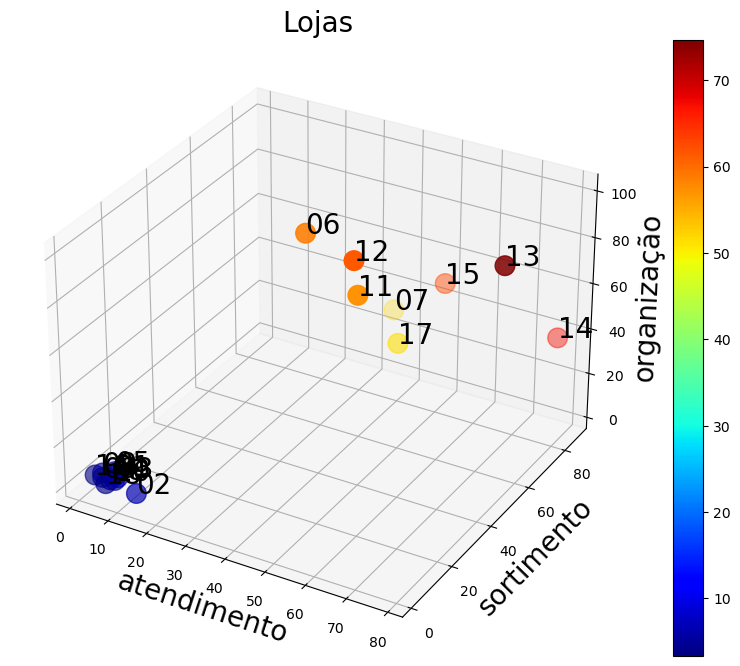

In [80]:
# Gráfico 3D com scatter

from mpl_toolkits.mplot3d import Axes3D

# Criação da figura e do eixo 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

cs = (df['atendimento'].values + df['sortimento'].values + df['organização'].values)/3

# colorscheme
# s = pointsize
# c = sequencia de cores
# cmap = colormap

# Gráfico de dispersão 3D
scatter = ax.scatter3D(df['atendimento'], 
             df['sortimento'], 
             df['organização'],
             s = 200,
             c=cs,
             cmap='jet')

# Configurações dos eixos e do título
ax.set_xlabel('atendimento',
              fontsize = 20)
ax.set_ylabel('sortimento',
              fontsize = 20)
ax.set_zlabel('organização',
              fontsize = 20)
plt.title('Lojas',
              fontsize = 20)

# Rótulos dos pontos
for i, txt in enumerate(df['loja']):
    ax.text(df['atendimento'][i],  
            df['sortimento'][i],  
            df['organização'][i], 
            '%s' % (txt), 
            size = 20)

cbar = plt.colorbar(scatter)
cbar.ax.set_xlabel('Notas Médias', 
                   fontsize = 20)
plt.show()

## 4.2. Clusterização hierárquica aglomerativa

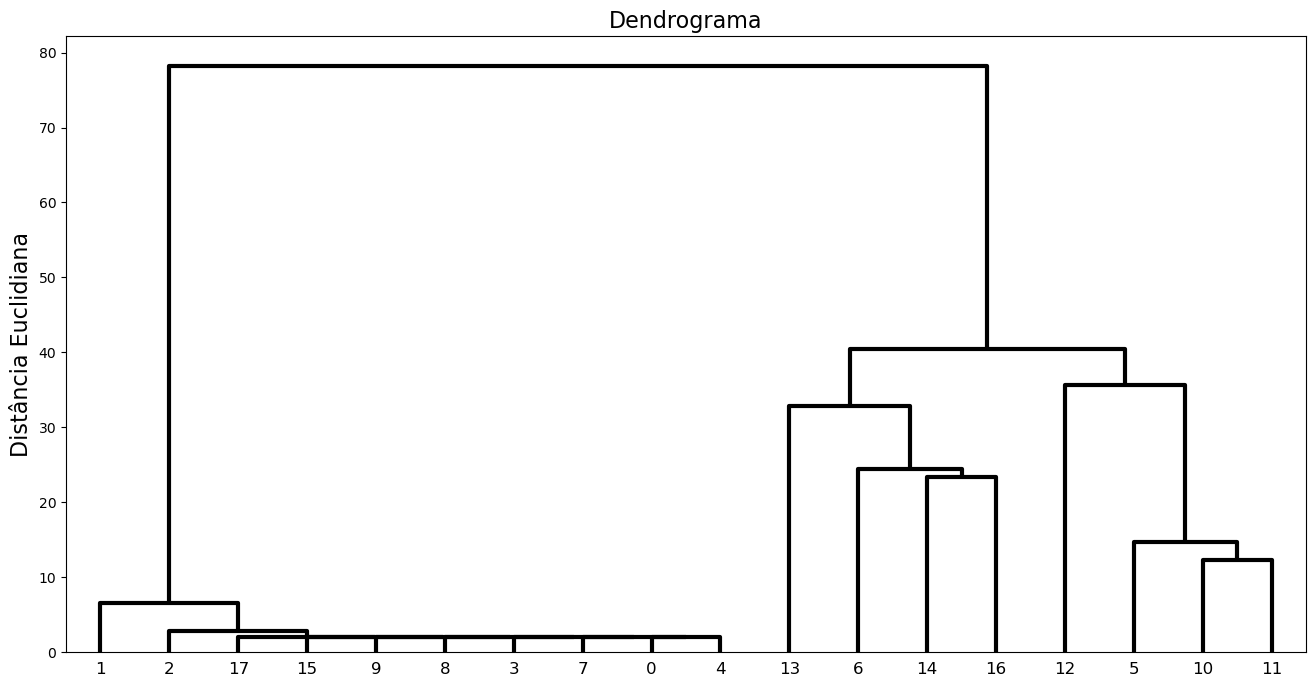

In [81]:
# Dendrograma

df_cluster = df[['atendimento', 'sortimento', 'organização']]
plt.figure(figsize=(16,8))
sch.set_link_color_palette(['black'])
dendrogram = sch.dendrogram(sch.linkage(df_cluster, method = 'single', metric = 'euclidean'), above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()


In [92]:
# Definindo 3 clusters para comparar com regionais

# Vamos gerar uma variável indicando 3 clusters

# Note que 'distance_threshold = None', pois estamos indicando que queremos 3 clusters
# mas não sabemos qual a distância de corte. 

clusters = AgglomerativeClustering(n_clusters = 3, distance_threshold = None, metric = 'euclidean', linkage = 'single', compute_distances=False)
indica_clusters = clusters.fit_predict(df_cluster)


df['cluster_H'] = indica_clusters

print(indica_clusters, "\n")


print(df.head(10))

[1 1 1 1 1 0 2 1 1 1 0 0 0 2 2 1 2 1] 

  loja    regional  atendimento  sortimento  organização  cluster_H  \
0   01  Regional 3          6.0         6.0          4.0          1   
1   02  Regional 3         14.0         2.0          4.0          1   
2   03  Regional 3          8.0         4.0          6.0          1   
3   04  Regional 3          4.0         4.0          4.0          1   
4   05  Regional 3          6.0         6.0          6.0          1   
5   06  Regional 2         38.0        38.0        100.0          0   
6   07  Regional 1         40.0        78.0         38.0          2   
7   08  Regional 3          6.0         4.0          4.0          1   
8   09  Regional 3          4.0         4.0          6.0          1   
9   10  Regional 3          6.0         6.0          2.0          1   

   cluster_H_man  
0              1  
1              1  
2              1  
3              1  
4              1  
5              0  
6              2  
7              1  
8      

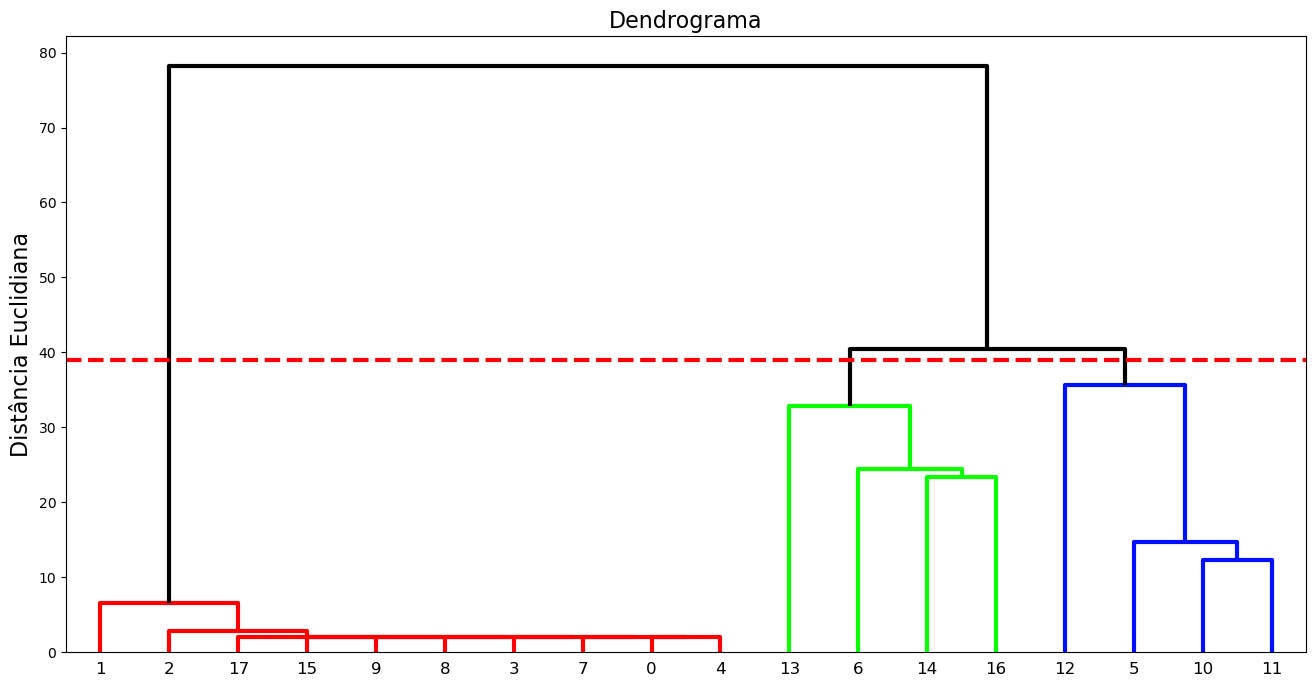

In [83]:
# Definir a paleta de cores
cmap = cm.hsv(np.linspace(0, 1, 4))


plt.figure(figsize=(16,8))
sch.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
dendrogram = sch.dendrogram(sch.linkage(df_cluster, method = 'single', metric = 'euclidean'), color_threshold = 39, above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
#plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 39, color = 'red', linestyle = '--')
plt.show()

In [86]:
# Estatísticas descritivas dos clusters por variável

print(df.groupby('cluster_H').agg({'atendimento': ['mean', 'std', 'min', 'max']}), '\n')
print(df.groupby('cluster_H').agg({'sortimento': ['mean', 'std', 'min', 'max']}), '\n')
print(df.groupby('cluster_H').agg({'organização': ['mean', 'std', 'min', 'max']}))

          atendimento                       
                 mean        std   min   max
cluster_H                                   
0                55.0  15.705625  38.0  76.0
1                 6.2   3.190263   2.0  14.0
2                56.0  15.916449  40.0  78.0 

          sortimento                       
                mean        std   min   max
cluster_H                                  
0               41.0  12.909944  32.0  60.0
1                4.2   1.475730   2.0   6.0
2               74.0  12.754084  56.0  86.0 

          organização                       
                 mean       std   min    max
cluster_H                                   
0                93.0  7.023769  86.0  100.0
1                 4.4  1.264911   2.0    6.0
2                45.0  9.451631  38.0   58.0


In [87]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# ANOVA


columns = df_cluster.columns.values
for column in columns:
    print(column)
    formula = column + ' ~ C(cluster_H)'
    model = ols(formula, data=df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    aov_table = aov_table
    print(aov_table, '\n')
    
## Todas auxiliam na formação de pelo menos um cluster

atendimento
                    sum_sq    df          F        PR(>F)
C(cluster_H)  10804.177778   2.0  50.911871  2.061584e-07
Residual       1591.600000  15.0        NaN           NaN 

sortimento
                    sum_sq    df          F        PR(>F)
C(cluster_H)  14804.177778   2.0  110.19386  1.077224e-09
Residual       1007.600000  15.0        NaN           NaN 

organização
                    sum_sq    df           F        PR(>F)
C(cluster_H)  23155.377778   2.0  403.497522  9.102600e-14
Residual        430.400000  15.0         NaN           NaN 



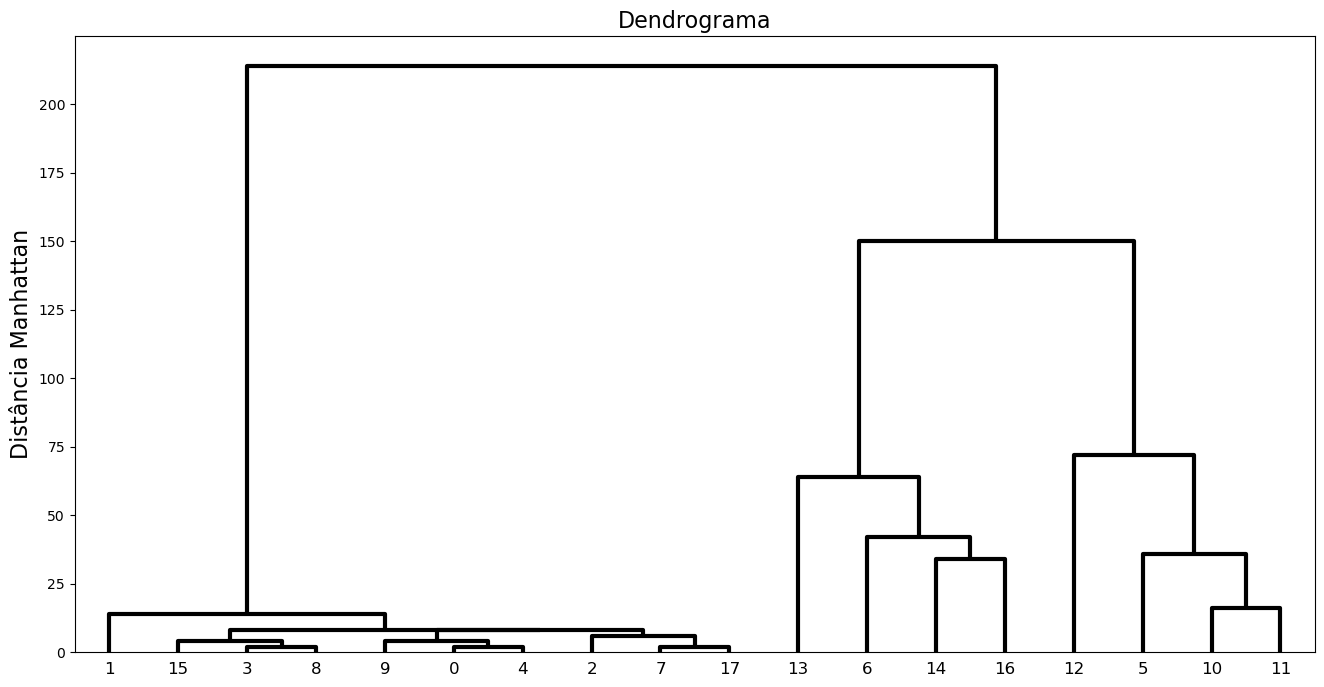

In [89]:
# Vamos realizar uma análise de robustez do resultado anterior
## Vamos alterar a medida de distância e o método de encadeamento

# Dendrograma

df_cluster = df[['atendimento', 'sortimento', 'organização']]
plt.figure(figsize=(16,8))
sch.set_link_color_palette(['black'])
dendrogram = sch.dendrogram(sch.linkage(df_cluster, method = 'complete', metric = 'cityblock'), above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
plt.ylabel('Distância Manhattan', fontsize=16)
plt.show()

## De fato, o resultado também aponta para 3 clusters



In [93]:
# Definindo 3 clusters para comparar com regionais


clusters = AgglomerativeClustering(n_clusters = 3, distance_threshold = None, metric = 'cityblock', linkage = 'complete', compute_distances=False)
indica_clusters = clusters.fit_predict(df_cluster)


df['cluster_H_man'] = indica_clusters

print(indica_clusters, "\n")


print(df.head(10))

[1 1 1 1 1 0 2 1 1 1 0 0 0 2 2 1 2 1] 

  loja    regional  atendimento  sortimento  organização  cluster_H  \
0   01  Regional 3          6.0         6.0          4.0          1   
1   02  Regional 3         14.0         2.0          4.0          1   
2   03  Regional 3          8.0         4.0          6.0          1   
3   04  Regional 3          4.0         4.0          4.0          1   
4   05  Regional 3          6.0         6.0          6.0          1   
5   06  Regional 2         38.0        38.0        100.0          0   
6   07  Regional 1         40.0        78.0         38.0          2   
7   08  Regional 3          6.0         4.0          4.0          1   
8   09  Regional 3          4.0         4.0          6.0          1   
9   10  Regional 3          6.0         6.0          2.0          1   

   cluster_H_man  
0              1  
1              1  
2              1  
3              1  
4              1  
5              0  
6              2  
7              1  
8      

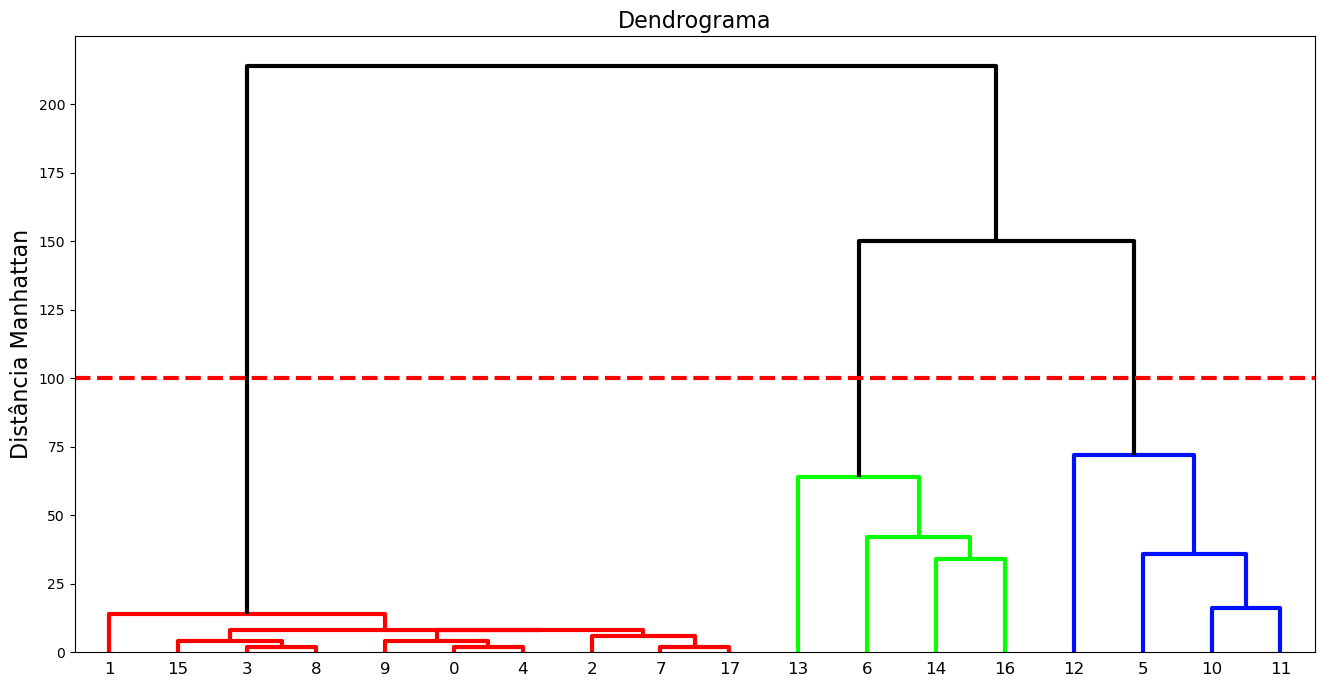

In [95]:
# Definir a paleta de cores
cmap = cm.hsv(np.linspace(0, 1, 4))


plt.figure(figsize=(16,8))
sch.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
dendrogram = sch.dendrogram(sch.linkage(df_cluster, method = 'complete', metric = 'cityblock'), color_threshold = 100, above_threshold_color = 'black')
plt.title('Dendrograma', fontsize=16)
#plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Manhattan', fontsize=16)
plt.axhline(y = 100, color = 'red', linestyle = '--')
plt.show()

## 4.3. Clusterização não-hierárquica KMeans

In [96]:
# Considerando que identificamos 3 possíveis clusters na análise hierárquica
df_cluster = df[['atendimento', 'sortimento', 'organização']]
kmeans = KMeans(n_clusters = 3, init = 'random').fit(df_cluster)


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [97]:
#%% Para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_

print(kmeans_clusters)

df['cluster_kmeans'] = kmeans_clusters

print(df)


[1 1 1 1 1 2 0 1 1 1 2 2 2 0 0 1 0 1]
   loja    regional  atendimento  sortimento  organização  cluster_H  \
0    01  Regional 3          6.0         6.0          4.0          1   
1    02  Regional 3         14.0         2.0          4.0          1   
2    03  Regional 3          8.0         4.0          6.0          1   
3    04  Regional 3          4.0         4.0          4.0          1   
4    05  Regional 3          6.0         6.0          6.0          1   
5    06  Regional 2         38.0        38.0        100.0          0   
6    07  Regional 1         40.0        78.0         38.0          2   
7    08  Regional 3          6.0         4.0          4.0          1   
8    09  Regional 3          4.0         4.0          6.0          1   
9    10  Regional 3          6.0         6.0          2.0          1   
10   11  Regional 2         54.0        32.0         86.0          0   
11   12  Regional 2         52.0        34.0         98.0          0   
12   13  Regional 2       

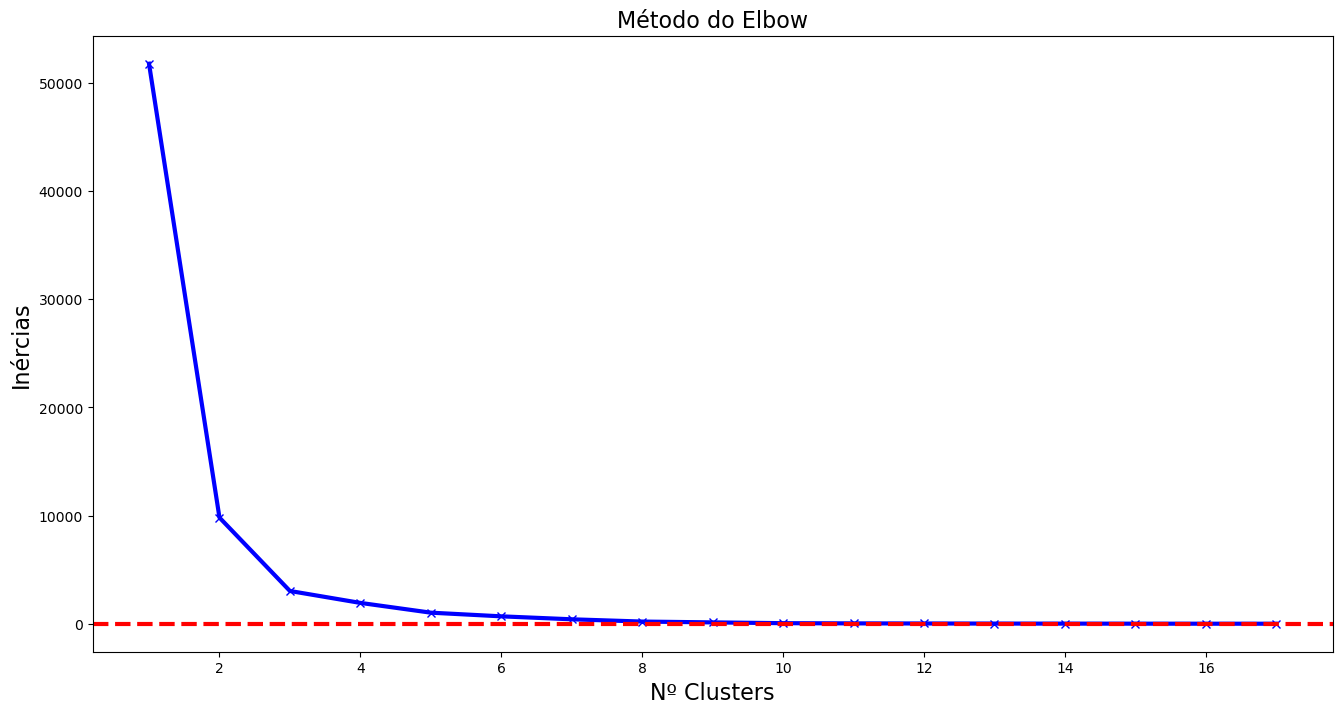

In [99]:
# Identificação da quantidade de clusters

# Método Elbow para identificação do nº de clusters
## Elaborado com base na "inércia": distância de cada obervação para o centróide de seu cluster
## Quanto mais próximos entre si e do centróide, menor a inércia

inercias = []
K = range(1,df_cluster.shape[0])
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto').fit(df_cluster)
    inercias.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inercias, 'bx-')
plt.axhline(y = 20, color = 'red', linestyle = '--')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Inércias', fontsize=16)
plt.title('Método do Elbow', fontsize=16)
plt.show()

# Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra"

In [100]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# ANOVA


columns = df_cluster.columns.values
for column in columns:
    print(column)
    formula = column + ' ~ C(cluster_kmeans)'
    model = ols(formula, data=df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    aov_table = aov_table
    print(aov_table, '\n')
    
## Todas auxiliam na formação de pelo menos um cluster

atendimento
                         sum_sq    df          F        PR(>F)
C(cluster_kmeans)  10804.177778   2.0  50.911871  2.061584e-07
Residual            1591.600000  15.0        NaN           NaN 

sortimento
                         sum_sq    df          F        PR(>F)
C(cluster_kmeans)  14804.177778   2.0  110.19386  1.077224e-09
Residual            1007.600000  15.0        NaN           NaN 

organização
                         sum_sq    df           F        PR(>F)
C(cluster_kmeans)  23155.377778   2.0  403.497522  9.102600e-14
Residual             430.400000  15.0         NaN           NaN 



# Exemplo 5: Cartão de Crédito

## 5.1. Base de dados

In [115]:
# Importando os dados

df = pd.read_csv('datasets/cartao_credito.csv')

In [116]:
#%% Visualizando os dados e cada uma das variáveis
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [118]:
summary = df.describe(include = 'all')
summary

## Neste caso, faremos a padronização

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [120]:
## As variáveis apresentam unidades de medida e amplitudes muito distintas

# Padronizando as variáveis

from sklearn.preprocessing import scale
df_cluster = pd.DataFrame(scale(df.iloc[:, 2:7]),
                     index=df.iloc[:, 2:7].index,
                     columns=df.iloc[:, 2:7].columns)

df_cluster.head(10)


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


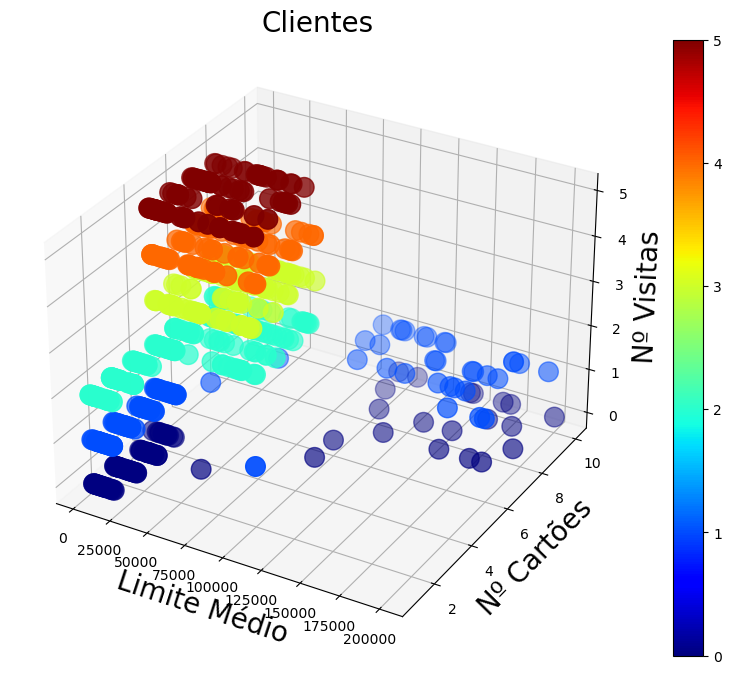

In [123]:
# Gráfico 3D com scatter

from mpl_toolkits.mplot3d import Axes3D

# Criação da figura e do eixo 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

cs =  df['Total_visits_bank']

# colorscheme
# s = pointsize
# c = sequencia de cores
# cmap = colormap

# Gráfico de dispersão 3D
scatter = ax.scatter3D(df['Avg_Credit_Limit'], 
             df['Total_Credit_Cards'], 
             df['Total_visits_bank'],
             s = 200,
             c=cs,
             cmap='jet')

# Configurações dos eixos e do título
ax.set_xlabel('Limite Médio',
              fontsize = 20)
ax.set_ylabel('Nº Cartões',
              fontsize = 20)
ax.set_zlabel('Nº Visitas',
              fontsize = 20)
plt.title('Clientes',
              fontsize = 20)


cbar = plt.colorbar(scatter)

plt.show()

## 5.2. Clusterização não-hierárquica KMeans

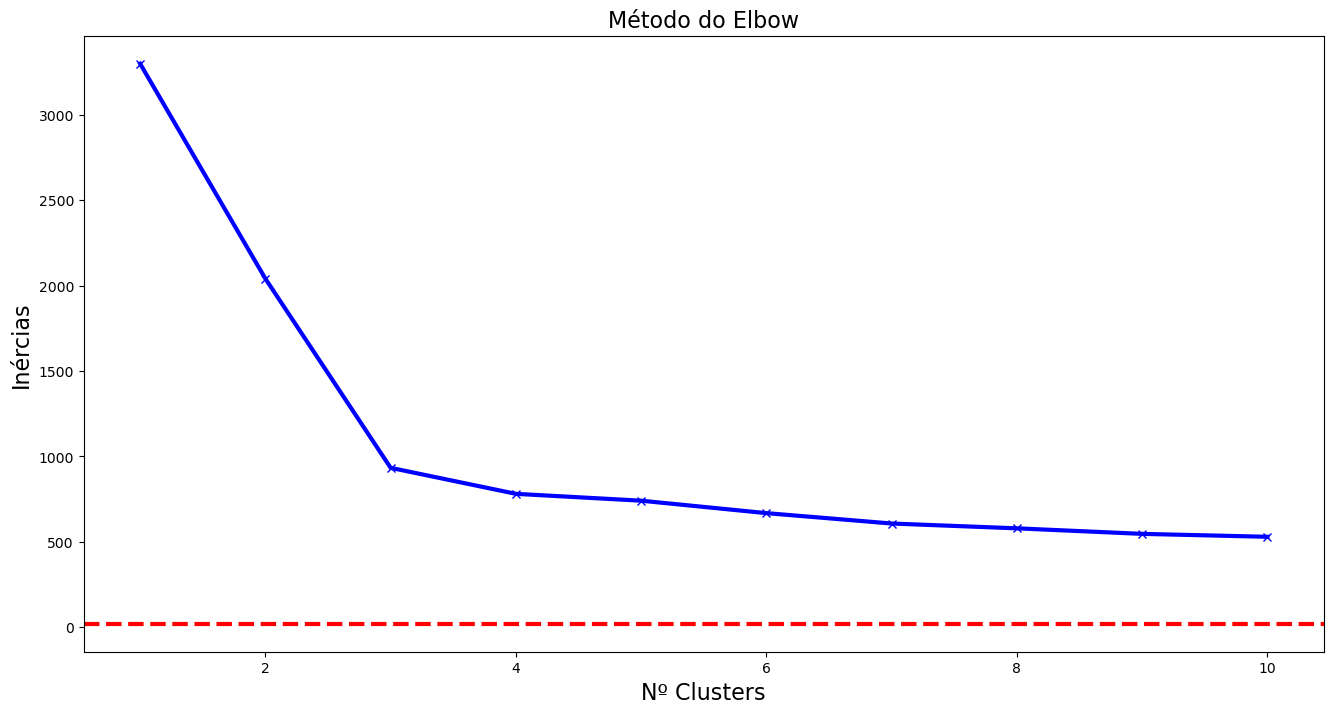

In [130]:
# Identificação da quantidade de clusters

# Método Elbow para identificação do nº de clusters
## Elaborado com base na "inércia": distância de cada obervação para o centróide de seu cluster
## Quanto mais próximos entre si e do centróide, menor a inércia

inercias = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init='auto').fit(df_cluster)
    inercias.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inercias, 'bx-')
plt.axhline(y = 20, color = 'red', linestyle = '--')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Inércias', fontsize=16)
plt.title('Método do Elbow', fontsize=16)
plt.show()

# Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra"
## Podemos concluir que 4 clusters é uma opção viável

In [131]:
# Elaboração da clusterização não hieráquica k-means

kmeans = KMeans(n_clusters = 4, init = 'random').fit(df_cluster)


/home/hiro/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [133]:
#%% Para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_

print(kmeans_clusters)

df['cluster_kmeans'] = kmeans_clusters

print(df.head(10))

[0 1 0 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 2 0 2 0 2 2 2 2 0 0 0 2 0 2 0 0 2 0 2 2 0 0 2 0 0 2 0 2 0
 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 0 0 0 0 2 2 0 0 2 0 0 0 0 2 2
 2 2 2 2 2 2 0 2 2 2 0 0 2 2 2 0 0 0 0 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 0 2 0
 2 2 2 2 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 2
 0 0 2 2 2 0 2 0 2 0 0 0 0 0 2 2 0 0 2 2 0 2 2 0 2 2 2 0 0 0 0 2 0 0 0 0 0
 2 0 0 0 2 2 2 0 0 0 2 0 2 0 2 0 0 2 0 0 2 2 2 2 2 0 0 0 2 0 0 0 2 0 0 0 2
 2 2 2 0 2 0 0 2 2 2 0 0 2 0 0 2 2 2 2 2 0 2 0 2 2 0 2 0 0 0 0 2 2 2 0 0 0
 0 0 2 2 0 0 2 2 2 0 2 2 

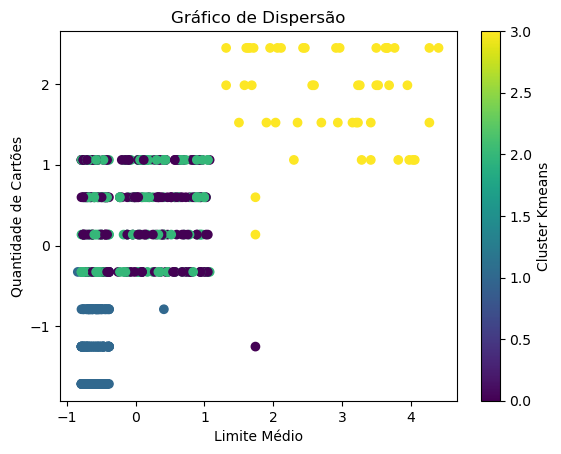

In [137]:
# Analisando por meio de gráficos 
plt.scatter(df_cluster['Avg_Credit_Limit'], df_cluster['Total_Credit_Cards'],
            c=df['cluster_kmeans'], cmap='viridis')
plt.xlabel('Limite Médio')
plt.ylabel('Quantidade de Cartões')
plt.title('Gráfico de Dispersão')
plt.colorbar(label='Cluster Kmeans')
plt.show()

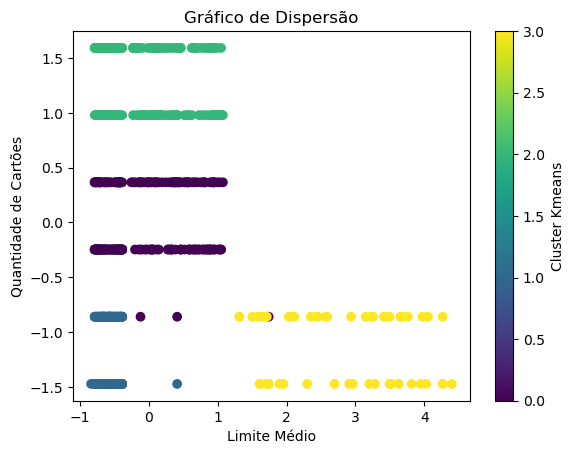

In [140]:
# Analisando por meio de gráficos 
plt.scatter(df_cluster['Avg_Credit_Limit'], df_cluster['Total_visits_bank'],
            c=df['cluster_kmeans'], cmap='viridis')
plt.xlabel('Limite Médio')
plt.ylabel('Quantidade de Cartões')
plt.title('Gráfico de Dispersão')
plt.colorbar(label='Cluster Kmeans')
plt.show()

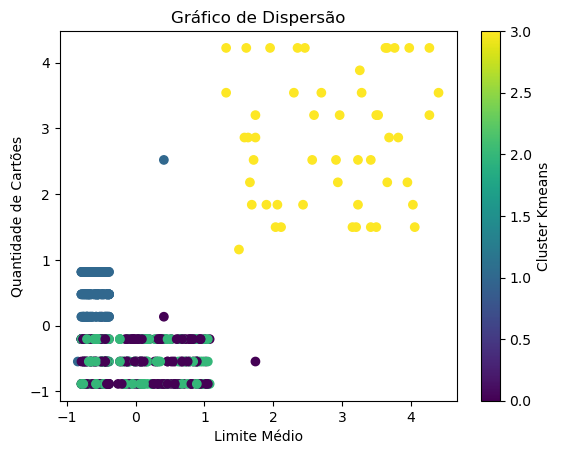

In [141]:
# Analisando por meio de gráficos 
plt.scatter(df_cluster['Avg_Credit_Limit'], df_cluster['Total_visits_online'],
            c=df['cluster_kmeans'], cmap='viridis')
plt.xlabel('Limite Médio')
plt.ylabel('Quantidade de Cartões')
plt.title('Gráfico de Dispersão')
plt.colorbar(label='Cluster Kmeans')
plt.show()

In [144]:
analise = df.groupby('cluster_kmeans').agg({'Avg_Credit_Limit': 'mean', 'Total_Credit_Cards': 'mean',
       'Total_visits_bank': 'mean', 'Total_visits_online': 'mean', 'Total_calls_made': 'mean'})

analise

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
cluster_kmeans,,,,,
0,35904.522613,5.522613,2.477387,0.969849,2.075377
1,12167.420814,2.393665,0.927602,3.574661,6.923077
2,31226.315789,5.478947,4.515789,1.010526,1.936842
3,141040.000000,8.740000,0.600000,10.900000,1.080000


In [146]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# ANOVA


columns = df_cluster.columns.values
for column in columns:
    print(column)
    formula = column + ' ~ C(cluster_kmeans)'
    model = ols(formula, data=df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    aov_table = aov_table
    print(aov_table, '\n')
    
## Todas auxiliam na formação de pelo menos um cluster


Avg_Credit_Limit
                         sum_sq     df          F         PR(>F)
C(cluster_kmeans)  6.801862e+11    3.0  588.47431  1.628576e-185
Residual           2.527452e+11  656.0        NaN            NaN 

Total_Credit_Cards
                        sum_sq     df           F         PR(>F)
C(cluster_kmeans)  2241.540596    3.0  572.983473  9.347851e-183
Residual            855.435162  656.0         NaN            NaN 

Total_visits_bank
                        sum_sq     df           F         PR(>F)
C(cluster_kmeans)  1492.851438    3.0  1246.21566  2.194261e-270
Residual            261.942502  656.0         NaN            NaN 

Total_visits_online
                        sum_sq     df            F         PR(>F)
C(cluster_kmeans)  4663.259615    3.0  1003.328977  1.438993e-244
Residual           1016.316142  656.0          NaN            NaN 

Total_calls_made
                        sum_sq     df           F         PR(>F)
C(cluster_kmeans)  3745.932907    3.0  492.110937  2.